In [5]:
import pandas as pd
import matplotlib.pyplot as pt

In [7]:
df =pd.read_csv("TESLA SALES RAW FILE.csv")

In [ ]:
df.head()
#top 5 rows

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [10]:
df.shape

(2640, 12)

In [11]:
df.columns

Index(['Year', 'Month', 'Region', 'Model', 'Estimated_Deliveries',
       'Production_Units', 'Avg_Price_USD', 'Battery_Capacity_kWh', 'Range_km',
       'CO2_Saved_tons', 'Source_Type', 'Charging_Stations'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


In [13]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2635    False
2636    False
2637    False
2638    False
2639    False
Length: 2640, dtype: bool>

In [16]:
df['Estimated_Revenue_USD']=df['Estimated_Deliveries']*df['Avg_Price_USD']

In [17]:
print(df.to_string())

      Year  Month         Region       Model  Estimated_Deliveries  Production_Units  Avg_Price_USD  Battery_Capacity_kWh  Range_km  CO2_Saved_tons           Source_Type  Charging_Stations  Estimated_Revenue_USD
0     2023      5         Europe     Model S                 17646             17922       92874.27                   120       704         1863.42  Interpolated (Month)              12207           1.638859e+09
1     2015      2           Asia     Model X                  3797              4164       62205.65                    75       438          249.46    Official (Quarter)               7640           2.361949e+08
2     2019      1  North America     Model X                  8411              9189      117887.32                    82       480          605.59  Interpolated (Month)              14071           9.915502e+08
3     2021      2  North America     Model 3                  6555              7311       89294.91                   120       712          700.07    O

In [19]:
df.groupby('Year')[['Estimated_Deliveries','Estimated_Revenue_USD']].sum()


,Estimated_Deliveries,Estimated_Revenue_USD
Year,,
2015,2375267,2.020542e+11
2016,2434081,2.066250e+11
2017,2350517,1.971317e+11
2018,2423104,2.081274e+11
2019,2404230,2.014564e+11
2020,2280336,1.903011e+11
2021,2335116,1.970671e+11
2022,2434220,2.076256e+11
2023,2382375,2.002269e+11


In [20]:
df['Revenue_Million_USD'] = df['Estimated_Revenue_USD'] / 1_000_000

In [21]:
print(df.to_string())

      Year  Month         Region       Model  Estimated_Deliveries  Production_Units  Avg_Price_USD  Battery_Capacity_kWh  Range_km  CO2_Saved_tons           Source_Type  Charging_Stations  Estimated_Revenue_USD  Revenue_Million_USD
0     2023      5         Europe     Model S                 17646             17922       92874.27                   120       704         1863.42  Interpolated (Month)              12207           1.638859e+09          1638.859368
1     2015      2           Asia     Model X                  3797              4164       62205.65                    75       438          249.46    Official (Quarter)               7640           2.361949e+08           236.194853
2     2019      1  North America     Model X                  8411              9189      117887.32                    82       480          605.59  Interpolated (Month)              14071           9.915502e+08           991.550249
3     2021      2  North America     Model 3                  6555  

In [22]:
df.drop('Estimated_Revenue_USD', axis=1, inplace=True)

In [23]:
print(df.to_string())

      Year  Month         Region       Model  Estimated_Deliveries  Production_Units  Avg_Price_USD  Battery_Capacity_kWh  Range_km  CO2_Saved_tons           Source_Type  Charging_Stations  Revenue_Million_USD
0     2023      5         Europe     Model S                 17646             17922       92874.27                   120       704         1863.42  Interpolated (Month)              12207          1638.859368
1     2015      2           Asia     Model X                  3797              4164       62205.65                    75       438          249.46    Official (Quarter)               7640           236.194853
2     2019      1  North America     Model X                  8411              9189      117887.32                    82       480          605.59  Interpolated (Month)              14071           991.550249
3     2021      2  North America     Model 3                  6555              7311       89294.91                   120       712          700.07    Official 

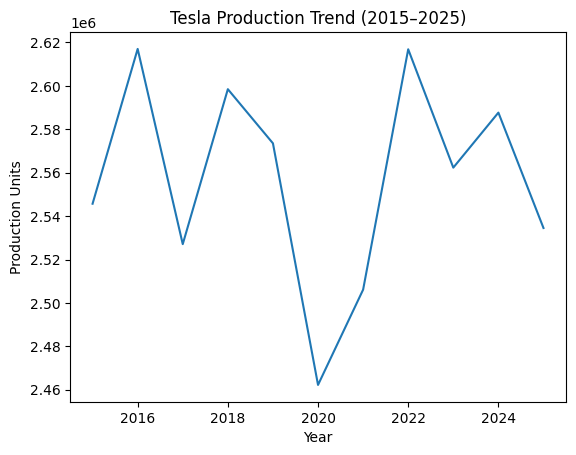

In [ ]:
# Tesla Production Trend (Year-wise)
yearly_prod = df.groupby('Year')['Production_Units'].sum()

plt.figure()
plt.plot(yearly_prod.index, yearly_prod.values)
plt.xlabel("Year")
plt.ylabel("Production Units")
plt.title("Tesla Production Trend (2015–2025)")
plt.show()


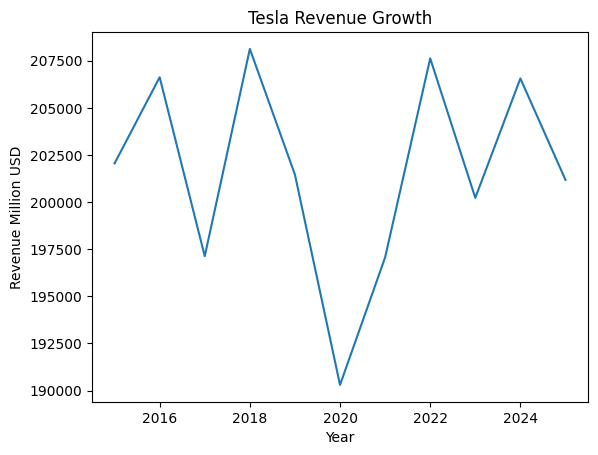

In [25]:
# Revenue Trend
yearly_rev=df.groupby('Year')['Revenue_Million_USD'].sum()
plt.figure()
plt.plot(yearly_rev.index, yearly_rev.values)
plt.xlabel("Year")
plt.ylabel("Revenue Million USD")
plt.title("Tesla Revenue Growth")
plt.show()

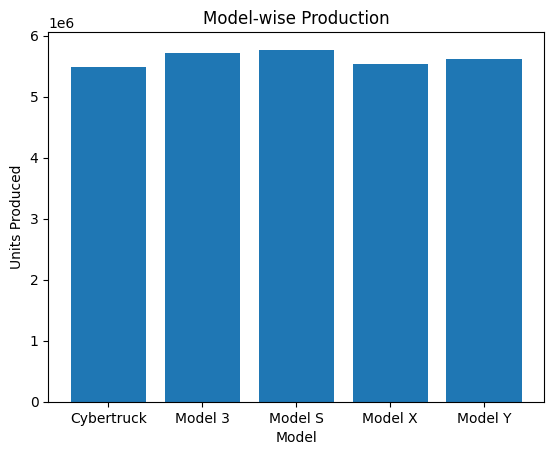

In [26]:
model_prod=df.groupby('Model')['Production_Units'].sum()
plt.figure()
plt.bar(model_prod.index, model_prod.values)
plt.xlabel("Model")
plt.ylabel("Units Produced")
plt.title("Model-wise Production")
plt.show()

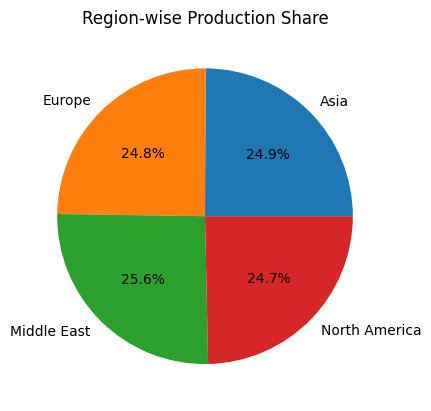

In [27]:
region_prod = df.groupby('Region')['Production_Units'].sum()

plt.figure()
plt.pie(region_prod.values, labels=region_prod.index, autopct='%1.1f%%')
plt.title("Region-wise Production Share")
plt.show()


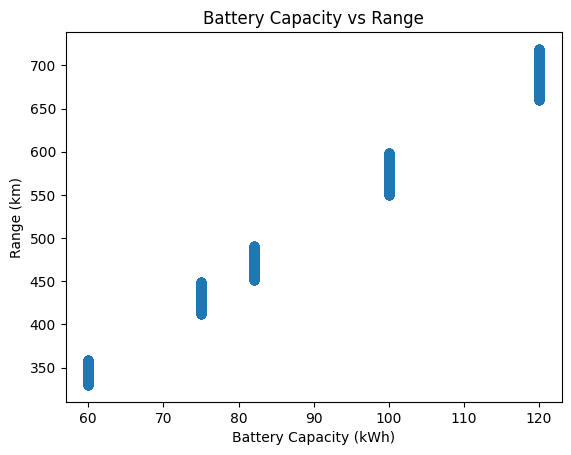

In [28]:
plt.figure()
plt.scatter(df['Battery_Capacity_kWh'], df['Range_km'])
plt.xlabel("Battery Capacity (kWh)")
plt.ylabel("Range (km)")
plt.title("Battery Capacity vs Range")
plt.show()


In [29]:
df.to_csv("TESLA_SALES_UPDATED.csv", index=False)
